# Analyzing borrowers’ risk of defaulting


This project aims to prepare a report for a banks loan division with the goal of improving the evaluation of customers credit worthiness. 
The datset will need preprocessing in order to make analysis possible.

This project will investigate if a customer's marital status and number of children have an impact on whether a customer will default on a loan. 

We can do so using the following steps:

1. **Exploratory data analysis**
    
    We will check for any clear errors in the dataset and investigate how they might have arisen.
    
    
2. **Data transformation**
    
    Correct any clear errors, artifacts and duplicates.
    
    
3. **Working with missing values**
    
    Establishing suitable methods for correcting missing values, creating functions where necessary.
    
    
4. **Categorisation of data**
    
    Creating categories for data to assist in making conclusions.
    
    
5. **Checking hypotheses**
    
    Using the preprocessed data to answer the questions posed at the start of the project.
    



In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import statistics

    
# Load the data
df = pd.read_csv('/datasets/credit_scoring_eng.csv')

## 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan


In [2]:
# Let's see how many rows and columns our dataset has
df.shape


(21525, 12)

In [3]:
# let's print the first 15 rows

df.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


***Potential issues***

- `days_employed` is a often negative and some positive values are impossible
- `education` contains various cases
- some NaN values
- `purpose` contains very similar but distinct purposes


In [4]:
# Get info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


There are only missing values in the columns `days_employed` and `total_income`, both of which have exactly the same number of missing values.

In [5]:
# Let's look at the filtered table with missing values in the the first column with missing data
df[df['days_employed'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate




On initial investigation is appears that the null values are symmetric between `days_employed` and `total_income`.

We can check by taking a slice where `days_employed`is null and  `total_income` is not null and checking if it is an empty dataframe.



In [6]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.
df[df['days_employed'].isnull() & df['total_income'].notnull()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [7]:
df[df['total_income'].notnull() & df['days_employed'].isnull()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose





**Intermediate conclusion**

There are no rows that contain only null values in either `days_employed` and `total_income`, any row that contains a null value in `days_employed` contains a null value in `total_income` and vice versa. 

Approximately 10% of the rows contain null values. Not an insurmountable amount of missing data but this could lead to bias if the missing data is due to a specific client characteristic. 

These null values could possibly be caused by older clients with 'retiree' `income_type` having misleading `days_employed` and `total_income`.

The null values in `days_employed` could have potentially caused issues with the value of `total_income` if `days_employed` is used in the calculation of client's debt. 

These issues can be investigated by taking slices of the dataframe that contain null values, checking the value counts as a percentage of the total and then comparing these to the value counts of the rest of the data set to identify if there any significant differences that may have been caused by the null values.



In [8]:
# checking the distribution of entries with null values by income_type
round(df[df['days_employed'].isnull()]['income_type'].value_counts()/len(df[df['days_employed'].isnull()]), 4)

employee         0.5083
business         0.2337
retiree          0.1900
civil servant    0.0676
entrepreneur     0.0005
Name: income_type, dtype: float64

In [9]:
# Checking distribution of the dataset without null values by income_type
round(df[df['days_employed'].notnull()]['income_type'].value_counts()/len(df[df['days_employed'].notnull()]), 4)

employee                       0.5175
business                       0.2365
retiree                        0.1779
civil servant                  0.0678
unemployed                     0.0001
student                        0.0001
paternity / maternity leave    0.0001
entrepreneur                   0.0001
Name: income_type, dtype: float64

In [10]:
# checking the distribution of entries with null values by debt
round(df[df['days_employed'].isnull()]['debt'].value_counts()/len(df[df['days_employed'].isnull()]), 3)

0    0.922
1    0.078
Name: debt, dtype: float64

In [11]:
# Checking distribution of the dataset without null values by debt
round(df[df['days_employed'].notnull()]['debt'].value_counts()/len(df[df['days_employed'].notnull()]), 3)

0    0.919
1    0.081
Name: debt, dtype: float64

In [12]:
# checking the distribution of entries with null values by dob_years
df[df['days_employed'].isnull()]['dob_years'].describe()

count    2174.000000
mean       43.632015
std        12.531481
min         0.000000
25%        34.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: dob_years, dtype: float64

In [13]:
# checking the distribution of entries without null values by dob_years
df[df['days_employed'].notnull()]['dob_years'].describe()

count    19351.000000
mean        43.255336
std         12.579170
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64



There appears to be no clear differences in `debt`, `income_type` or `age` between entries containing null values and those without null values, it therefore appears that these null values might be missing randomly.

One of other possible avenue of investigation is to check the distribution of the rows that contain null values throughout the dataset. If we find their index values 'clumped up' it may be that a block of data that was added at some point primarily contains the null values.

We can check if this is the case by looking at the distribution of indices of rows which contain null values.



In [14]:
#checking all rows containing null values
df[df['days_employed'].isnull()].describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,2174.000000,0.0,2174.000000,2174.000000,2174.000000,2174.000000,0.0
mean,0.552438,NaN,43.632015,0.800828,0.975161,0.078197,NaN
std,1.469356,NaN,12.531481,0.530157,1.418220,0.268543,NaN
min,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,34.000000,0.250000,0.000000,0.000000,NaN
50%,0.000000,NaN,43.000000,1.000000,0.000000,0.000000,NaN
75%,1.000000,NaN,54.000000,1.000000,1.000000,0.000000,NaN
max,20.000000,NaN,73.000000,3.000000,4.000000,1.000000,NaN


In [15]:
#checking all rows not containing null values
df[df['days_employed'].notnull()].describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000
mean,0.537388,63046.497661,43.255336,0.819079,0.972249,0.081184,26787.568355
std,1.371408,140827.311974,12.579170,0.550104,1.420596,0.273125,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [16]:
# checking the central tendency and spread of indices for rows null values
print(statistics.median(df.index[df['days_employed'].isnull()].to_list()))
print(statistics.stdev(df.index[df['days_employed'].isnull()].to_list()))

11090.5
6207.735946280718


In [17]:
# checking the central tendency and spread of indices for rows with no null values
print(statistics.median((df.index[df['days_employed'].notnull()].to_list())))
print(statistics.stdev((df.index[df['days_employed'].notnull()].to_list())))

10714
6214.146653406925



It appears the distibution is very similar between rows containing null values and those without. 
These missing results will probably not cause the dataset to be biased if removed or we can fill null values using representative statistics from the rest of the table.



**Conclusions**

Having check the distribution of other characteristics as well as the distribution of null values amongst rows, the distribution of missing values does appear to be random.

Since both of these are quantative variables, we should be able to fill in the missing data using either the mean or median `days_employed` and `total income` of customers with similar characteritics.


We still need to further and investigate:

- *duplicates*

    potentially by dropping them
    
    
- *different registers*

    correcting if possible
    
    
- *incorrect artifacts*

    finding and correcting
    
    
- *missing values*

    filling in based on averages from groups of similar customers

## 2. Data transformation


In [18]:
# Let's see all values in education column to check if and what spellings will need to be fixed
df['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [19]:
# Fix the registers
df['education']= df['education'].str.lower() 

In [20]:
# Checking all the values in the column to make sure we fixed them
df['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In [21]:
# Let's see the distribution of values in the `children` column
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

There are issues with 20 and -1 for children, both seem highly improbable. These could have been caused by human input error or be artifacts from previous methods of decribing the amount of children clients have, for example -1 may well of meant 'expecting children'. However, as this is one of the variables we are investigating and these clients make up approximately 0.57% of the data removing these rows will have a negligible impact on the analysis.

In [22]:
# fixing children data
df = df[(df['children'] != 20) & (df['children'] != -1)]

In [23]:
# Checking the `children` column again to make sure it's all fixed
df['children'].value_counts()

0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64


It's already apparent there are a number of negative values, null values and some impossibly large values.
We can check the number of negative values and impossibly large values by taking slices.

In [24]:
# checking overall distribution in years
df['days_employed'].describe()/365.25

count      52.676249
mean      172.922165
std       385.842418
min       -50.346201
25%        -7.521521
50%        -3.296192
75%        -0.793265
max      1099.946339
Name: days_employed, dtype: float64

In [25]:
df[df['days_employed'].isnull()].shape

(2162, 12)

In [26]:
#checking the number of negative values
df[df['days_employed'] < 0]['days_employed'].count()

15809

In [27]:
#checking the number of positive values
df[df['days_employed'] > 0]['days_employed'].count()

3431

In [28]:
#checking the number of impossible values
df[df['days_employed'] > 65*365]['days_employed'].count()

3431


There are some serious issues with the `days_employed` data. 
- There are a significant number of negative values
- The mean number of years worked is 172.92
- There are 2162 null values

It seems unlikely that this is human entry error and more likely systematic error caused by a change in how datetime was formatted.


These issues can be investigated further to identify if there are any patterns to these errors.



In [29]:
# investigating negative values

abs(df[df['days_employed'] < 0]['days_employed']).describe()/365.25

count    43.282683
mean      6.443953
std       6.309541
min       0.066096
25%       2.072058
50%       4.463911
75%       8.645462
max      50.346201
Name: days_employed, dtype: float64

These seem more realistic. It appears the negative values for `days_employed` are correct in their absolute values.

In [30]:
# Checking the row with the highest number of days work to see if it is plausible

negative_days = df[df['days_employed'] < 0]
negative_days.loc[negative_days['days_employed'] == negative_days['days_employed'].min()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16335,1,-18388.949901,61,secondary education,1,married,0,F,employee,0,29788.629,real estate transactions


Approximate 50 years worked at age 61 is possible although unlikely.
We can write a function to check the number of impossible values.

In [31]:
#writing a function to check wether the days_employed is possible
def impossible_days(row):
    years_employed = abs(row['days_employed'])/365.25
    age = row['dob_years']
    
    if years_employed >= age - 12:
        return 'impossible'
    else:
        return 'possible'
    
negative_days[['days_employed', 'dob_years']].apply(impossible_days, axis = 1).value_counts()

possible      15733
impossible       76
dtype: int64

There are still a small number of impossible values which could be removed.
The rows containing positive values for `days_employed` need to be dealt with first.

In [32]:
# Checking positive days_employed

df[df['days_employed'] > 0]['days_employed'].describe()

count      3431.000000
mean     365025.901401
std       21087.468233
min      328728.720605
25%      346649.346146
50%      365286.622650
75%      383292.791100
max      401755.400475
Name: days_employed, dtype: float64

In [33]:
# Checking positive days_employed years normalised to min of near 0

df[df['days_employed'] > 0]['days_employed'].describe()/1000 - 328.728

count   -325.297000
mean      36.297901
std     -307.640532
min        0.000721
25%       17.921346
50%       36.558623
75%       54.564791
max       73.027400
Name: days_employed, dtype: float64

In [34]:
positive_days = df[df['days_employed'] > 0]
def impossible_days(row):
    years_employed = abs(row['days_employed'])/1000 - 328.728
    age = row['dob_years']
    
    if years_employed >= age:
        return 'impossible'
    else:
        return 'possible'
    
positive_days[['days_employed', 'dob_years']].apply(impossible_days, axis = 1).value_counts()

possible      2800
impossible     631
dtype: int64

It appears this normalisation is not correct

In [35]:
#checking income_type of those with days_employed  >0
df[df['days_employed']>0].groupby('income_type')['days_employed'].describe()

,count,mean,std,min,25%,50%,75%,max
income_type,,,,,,,,
retiree,3429.0,365025.091981,21082.047113,328728.720605,346659.278376,365286.622650,383285.519623,401755.400475
unemployed,2.0,366413.652744,40855.478519,337524.466835,351969.059790,366413.652744,380858.245699,395302.838654


It is possible that when previously stored, the `days_employed` was calculated using data in another column and at some point a change has cause a knock on effect in errors.

The positive values appear to only be an issue for retirees and the unemployed

Although the distribution is different to negative days, this may be an artifact of changing how data was stored or merging of different databases.


Without further investigation into how all these errors originated it is difficult to correct them.
I believe the impact on the analysis will be small with minimal information lost as the true number of days employed should be correlated with `dob_years`, `education`, `income_type` and `total_income` and due to the fact that `days_employed` is not one of the main factors we are investigating.

In [36]:
# Check the `dob_years` for suspicious values and count the percentage
df['dob_years'].describe()

count    21402.000000
mean        43.300206
std         12.579055
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [37]:
#checking details of those with an incorrect age
df[df['dob_years'] < 18].describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,100.000000,90.000000,100.0,100.000000,100.000000,100.00000,90.000000
mean,0.480000,66694.128235,0.0,0.670000,1.250000,0.08000,25260.469356
std,0.797471,143952.928582,0.0,0.513554,1.526698,0.27266,11946.923686
min,0.000000,-10689.250498,0.0,0.000000,0.000000,0.00000,5595.912000
25%,0.000000,-2306.285529,0.0,0.000000,0.000000,0.00000,15776.284500
50%,0.000000,-1121.038104,0.0,1.000000,1.000000,0.00000,23198.625500
75%,1.000000,-237.418881,0.0,1.000000,3.000000,0.00000,34242.114250
max,3.000000,400992.375704,0.0,2.000000,4.000000,1.00000,61819.782000


Approximately 0.4% of the entries contain an impossible age, presumably due to human error. As there are no outliers in the rest of our data we can replace these entries. Age should correllate with `income_type` so it is possible to use the mean age of each `income_type`. We can also change the data type to int from float.

In [38]:
# finding the mean age for each income type and filling in erroneous values with the mean

for type in df['income_type'].unique():
    avg = df[(df['income_type'] == type) & (df['dob_years'] >= 18)]['dob_years'].mean()
    
    df.loc[(df['dob_years'] < 18) & (df['income_type'] == type), 'dob_years'] = avg


In [39]:
# Check the result - make sure it's fixed
df[df['dob_years'] < 18].describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#converting dob_years to int

df = df.astype({'dob_years': int}, errors='ignore') 

df['dob_years'].describe()

count    21402.000000
mean        43.503925
std         12.235540
min         19.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

Now let's check the `family_status` column. 

In [41]:
# Let's see the details for the family_status column

df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [42]:
df['family_status'].value_counts()

married              12302
civil partnership     4160
unmarried             2799
divorced              1189
widow / widower        952
Name: family_status, dtype: int64

No obvious issues with `family_status` column, it can remain unchanged

Now let's check the `gender` column.

In [43]:
# Let's see the values in the column
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [44]:
#checking the number of XNA
df['gender'].value_counts()

F      14154
M       7247
XNA        1
Name: gender, dtype: int64

As there's only one `XNA` we can remove it without impacting analysis

In [45]:
# Address the problematic values, if they exist
df = df[df['gender'] != 'XNA']

In [46]:
# Check the result - make sure it's fixed

df['gender'].value_counts()

F    14154
M     7247
Name: gender, dtype: int64

Now let's check the `income_type` column.

In [47]:
# Let's see the values in the column

df['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [48]:
df['income_type'].value_counts()

employee                       11050
business                        5053
retiree                         3839
civil servant                   1453
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

No noticable issues with `income_type`.

Now let's see if we have any duplicates in our data. 

In [49]:
# Checking duplicates
df.duplicated().sum()


71

In [50]:
df[df.duplicated(keep=False)].head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
120,0,NaN,46,secondary education,1,married,0,F,employee,0,NaN,university education
520,0,NaN,35,secondary education,1,civil partnership,1,F,employee,0,NaN,to have a wedding
541,0,NaN,57,secondary education,1,married,0,F,employee,0,NaN,second-hand car purchase
554,0,NaN,60,secondary education,1,married,0,M,employee,0,NaN,buy real estate
680,1,NaN,30,bachelor's degree,0,married,0,F,civil servant,0,NaN,purchase of the house for my family
1005,0,NaN,62,secondary education,1,married,0,F,retiree,0,NaN,housing renovation
1191,0,NaN,61,secondary education,1,married,0,F,retiree,0,NaN,real estate transactions
1431,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
1511,0,NaN,58,bachelor's degree,0,unmarried,4,F,retiree,0,NaN,supplementary education
1681,0,NaN,57,secondary education,1,civil partnership,1,F,retiree,0,NaN,having a wedding


Although it is possible for 2 clients to have identical characteristics, it is still unlikely. 
Thus we can remove the small number of duplicate rows.

In [51]:
# Address the duplicates, if they exist
df = df.drop_duplicates().reset_index(drop = True)

In [52]:
# Last check whether we have any duplicates
df.duplicated().sum()

0

In [53]:
# checking detail of the new dataset
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21330.000000,19239.000000,21330.000000,21330.000000,21330.000000,21330.000000,19239.000000
mean,0.474027,63163.226277,43.483263,0.816925,0.974496,0.081200,26791.503175
std,0.752389,140931.814378,12.230445,0.549235,1.421820,0.273149,16497.194890
min,0.000000,-18388.949901,19.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.256509,33.000000,1.000000,0.000000,0.000000,16479.999500
50%,0.000000,-1203.830172,43.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-289.734347,53.000000,1.000000,1.000000,0.000000,32549.611000
max,5.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000




Having correct the previously mentioned issues and removing duplicates, in total we have removed 177 values, approximately 0.82% of the data.

# 3. Working with missing values

### Restoring missing values in `total_income`


We need to address missing values in `total_income` and `days_employed`. 
We can fix them by creating categories and then filling in missing data using averages from these categories.

We can first start by creating an age category.

In [54]:
# Let's write a function that calculates the age category
def age_group(age):
    if age <25:
        return '0-25'
    elif age >=25 and age <=40:
        return '25-40'
    elif age >=40 and age <=60:
        return '40-60'
    else:
        return '60+' 
    

In [55]:
# Test if the function works
print(age_group(35))
print(age_group(19))
print(age_group(55))
print(age_group(66))

25-40
0-25
40-60
60+


In [56]:
# Creating new column based on function
df['age_group'] = df['dob_years'].apply(age_group)


In [57]:
# Checking how values in the new column
df['age_group'].value_counts()


40-60    9741
25-40    8601
60+      2118
0-25      870
Name: age_group, dtype: int64


Three of the 3 most important factors determining `total_income` are age, sector and education level.

For example, from he United Kingdom:


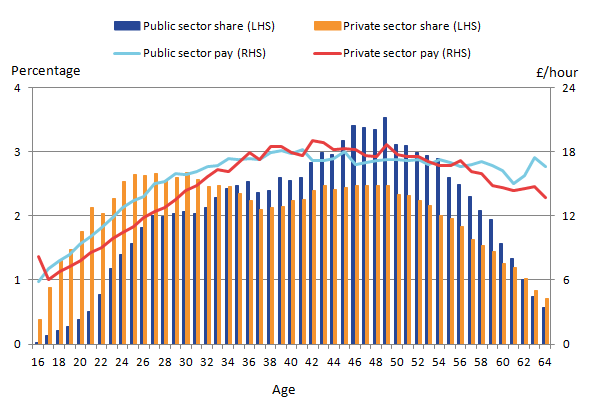

Source: [https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/articles/analysisoffactorsaffectingearningsusingannualsurveyofhoursandearnings/2016](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/articles/analysisoffactorsaffectingearningsusingannualsurveyofhoursandearnings/2016)


![a](https://www.statista.com/graphic/1/281936/average-salary-by-education-level-in-the-united-kingdom-uk.jpg)

Source: [https://www.statista.com/statistics/281936/average-salary-by-education-level-in-the-united-kingdom-uk/](https://www.statista.com/statistics/281936/average-salary-by-education-level-in-the-united-kingdom-uk/)


We can create a table that doesn't contain missing values and use data from this to fill in missing values in our dataset.

In [58]:
# Creating a table without missing values 
not_missing = df[df['days_employed'].notnull()]
not_missing.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-60
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,25-40
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,25-40
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,25-40
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,40-60
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,25-40
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,40-60
7,0,-152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,40-60
8,2,-6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,25-40
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,40-60


In [59]:
not_missing.groupby(['age_group'])['total_income'].mean().round(0)

age_group
0-25     22717.0
25-40    27828.0
40-60    27046.0
60+      23051.0
Name: total_income, dtype: float64

In [60]:
not_missing.groupby(['age_group'])['total_income'].median().round(0)

age_group
0-25     20575.0
25-40    24387.0
40-60    23214.0
60+      19633.0
Name: total_income, dtype: float64

In [61]:
not_missing.groupby(['education'])['total_income'].mean().round(0)

education
bachelor's degree      33167.0
graduate degree        27960.0
primary education      21145.0
secondary education    24588.0
some college           29034.0
Name: total_income, dtype: float64

In [62]:
not_missing.groupby(['education'])['total_income'].median().round(0)

education
bachelor's degree      28087.0
graduate degree        25162.0
primary education      18742.0
secondary education    21829.0
some college           25618.0
Name: total_income, dtype: float64

In [63]:
not_missing.groupby(['income_type'])['total_income'].mean().round(0)

income_type
business                       32414.0
civil servant                  27319.0
employee                       25818.0
entrepreneur                   79866.0
paternity / maternity leave     8613.0
retiree                        21952.0
student                        15712.0
unemployed                     21014.0
Name: total_income, dtype: float64

In [64]:
not_missing.groupby(['income_type'])['total_income'].median().round(0)

income_type
business                       27603.0
civil servant                  24067.0
employee                       22814.0
entrepreneur                   79866.0
paternity / maternity leave     8613.0
retiree                        18957.0
student                        15712.0
unemployed                     21014.0
Name: total_income, dtype: float64

All three of the measures used analysed appear to affect **total_income**.
The mean is consistantly higher than the median which would suggest it is being 'dragged up' by some extreme values.
It will therefore be more representative to use the median when filling in missing values.

In [65]:
#  Write a function that we will use for filling in missing values
def find_group_income(row):
    global not_missing
    age_group = row['age_group']
    education = row['education']
    income_type = row['income_type']
    
    median = not_missing[(not_missing['age_group'] == age_group) & (not_missing['education'] == education) & (not_missing['income_type'] == income_type)]['total_income'].median()
    return median
        

In [66]:
# Check if it works
find_group_income({'age_group': '0-25', 'education': 'secondary education', 'income_type': 'employee'})

18307.867

In [67]:
# applying lambda function row-wise on rows containing null values
df['total_income'] = df.apply(lambda row: find_group_income(row) if np.isnan(row['total_income']) else row['total_income'], axis=1)

In [68]:
# Check if we got any errors
df[df['total_income'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
5903,0,NaN,58,bachelor's degree,0,married,0,M,entrepreneur,0,NaN,buy residential real estate,40-60
8092,0,NaN,64,primary education,3,civil partnership,1,F,civil servant,0,NaN,to have a wedding,60+




There are two entries still with missing values as their characteristics didn't match with those of any other client.
We can replace them manually with an a `total_income` for that income_type.


In [69]:
# Replacing missing values if there are any errors
df.at[8092,'total_income'] = not_missing[not_missing['income_type'] == 'entrepreneur']['total_income'].median()
df.at[5903,'total_income'] = not_missing[not_missing['income_type'] == 'civil servant']['total_income'].median()

In [70]:
# Checking the number of entries in the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21330 entries, 0 to 21329
Data columns (total 13 columns):
children            21330 non-null int64
days_employed       19239 non-null float64
dob_years           21330 non-null int64
education           21330 non-null object
education_id        21330 non-null int64
family_status       21330 non-null object
family_status_id    21330 non-null int64
gender              21330 non-null object
income_type         21330 non-null object
debt                21330 non-null int64
total_income        21330 non-null float64
purpose             21330 non-null object
age_group           21330 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


###  Restoring values in `days_employed`


As previously noted, the absolute values of the negative `days_employed` appear to be correct, the positive values and missing values need to replaced.
We can first create a dataframe containing only the (absolute) negative values. 
We'll consider 

In [71]:
# Distribution of `days_employed` medians based on your identified parameters
correct_days = df[df['days_employed'] <0]
correct_days['days_employed'] = correct_days['days_employed'].apply(lambda x: x* -1)
print(correct_days.head())

   children  days_employed  dob_years            education  education_id  \
0         1    8437.673028         42    bachelor's degree             0   
1         1    4024.803754         36  secondary education             1   
2         0    5623.422610         33  secondary education             1   
3         3    4124.747207         32  secondary education             1   
5         0     926.185831         27    bachelor's degree             0   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1            married                 0      F    employee     0     17932.802   
2            married                 0      M    employee     0     23341.752   
3            married                 0      M    employee     0     42820.568   
5  civil partnership                 1      M    business     0     40922.170   

                   purpose age_group  
0    purchase of 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
# Distribution of `days_employed` means based on your identified parameters

correct_days.groupby('age_group')['days_employed'].mean()

age_group
0-25      851.167326
25-40    1864.893153
40-60    2984.070462
60+      3858.850205
Name: days_employed, dtype: float64

In [73]:
correct_days.groupby('education')['days_employed'].mean()

education
bachelor's degree      2279.221723
graduate degree        3520.186537
primary education      1940.672957
secondary education    2435.330271
some college           1554.086154
Name: days_employed, dtype: float64

In [74]:
correct_days.groupby('age_group')['days_employed'].median()

age_group
0-25      741.174748
25-40    1436.513060
40-60    2149.087007
60+      2613.341880
Name: days_employed, dtype: float64

In [75]:
correct_days.groupby('education')['days_employed'].median()

education
bachelor's degree      1611.313631
graduate degree        3851.735057
primary education      1189.581396
secondary education    1685.036213
some college           1148.776820
Name: days_employed, dtype: float64


It appears some extreme values are pulling up the mean. Therefore medians will be used.

In [76]:
# Let's write a function that calculates means or medians (depending on your decision) based on your identified parameter
def find_median_days(row):
    global correct_days
    age_group = row['age_group']
    education = row['education']
    
    median = correct_days[(not_missing['age_group'] == age_group) & (correct_days['education'] == education)]['total_income'].median()
    return median

In [77]:
# Check that the function works
print(find_median_days({'age_group': '0-25', 'education': 'secondary education'}))
print(find_median_days({'age_group': '60+', 'education': 'secondary education'}))


19555.0025
23078.083


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [78]:
# Apply function to the income_type
df['days_employed'] = df.apply(lambda row: find_median_days(row) if np.isnan(row['days_employed']) else row['days_employed'], axis=1)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [79]:
# Check if function worked

df[df['days_employed'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group


In [80]:
# changing negative values to positive
df['days_employed'] = df['days_employed'].apply(lambda x: x* -1 if x<0 else x)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-60
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,25-40
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,25-40
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,25-40
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,40-60


[When you think you've finished with `total_income`, check that the total number of values in this column matches the number of values in other ones.]

In [81]:
# Check the entries in all columns - make sure we fixed all missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21330 entries, 0 to 21329
Data columns (total 13 columns):
children            21330 non-null int64
days_employed       21330 non-null float64
dob_years           21330 non-null int64
education           21330 non-null object
education_id        21330 non-null int64
family_status       21330 non-null object
family_status_id    21330 non-null int64
gender              21330 non-null object
income_type         21330 non-null object
debt                21330 non-null int64
total_income        21330 non-null float64
purpose             21330 non-null object
age_group           21330 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


## 4. Categorization of data

We can make a number of categorisations for `purpose`, `children` and `total_income`

- We can categorise the `purpose` based on common themes
- We can categorise clients into those with and without children
- We can categorise `total_income` into quartiles.

In [82]:
# Print the values for your selected data for categorization

df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

There appears to be 4 main themes:
-car
-education
-real estate
-wedding


In [83]:
# Let's write a function to categorize the data based on common topics

def to_category(purpose):
    if 'car' in purpose:
        return 'car'
    elif 'wedding' in purpose:
        return 'wedding'
    elif any(x in purpose for x in ['educ', 'university']):
        return 'education'
    elif any(x in purpose for x in ['hous', 'estate', 'property']):
        return 'real estate'
    else:
        return purpose
    

In [84]:
# Create a column with the categories and count the values for them
df['purpose_category'] = df['purpose'].apply(to_category)
df['purpose_category'].value_counts()

real estate    10750
car             4279
education       3988
wedding         2313
Name: purpose_category, dtype: int64

We can categorise clients into those with and without children.

In [85]:
# Looking through all the numerical data in your selected column for categorization
df['children'].value_counts()

0    14090
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

In [86]:
# Creating function for categorizing into those with and without children
def parent(children):
    if children>0:
        return 1
    else:
        return 0


In [87]:
# Creating column with categories
df['parent'] = df['children'].apply(parent)

In [88]:
# Count each categories values to see the distribution
df['parent'].value_counts()

0    14090
1     7240
Name: parent, dtype: int64

In [89]:
#creatiing groups for income

#checking summary statistics
df['total_income'].describe()


count     21330.000000
mean      26481.938363
std       15752.915553
min        3306.762000
25%       17198.049750
50%       22929.770500
75%       31728.132000
max      362496.645000
Name: total_income, dtype: float64

In [90]:
#creating categories based on quartiles.
data = df['total_income'].describe()
def categorising_income(income):

    if income <= data['25%']:
        return 1
    elif income < data['50%']:
        return 2
    elif income < data['75%']:
        return 3
    else:
        return 4

In [91]:
#creating column
df['income_category'] = df['total_income'].apply(categorising_income)

## 5 Checking the Hypotheses


**Is there a correlation between having children and paying back on time?**

In [92]:
#checking data based on being a parent or not
df.groupby('parent')['debt'].value_counts()

for n in df['parent'].unique():
    parent_dict = {0:'Non-parent', 1: 'Parent'}
    default = df.groupby('parent')['debt'].value_counts()[n][1]
    non_default = df.groupby('parent')['debt'].value_counts()[n][0]
    total = default+non_default
    rate = round(((default/(total))*100),2)
    
    
    print(f'{parent_dict[n]} default rate = {rate}%, count: {total}')

Parent default rate = 9.24%, count: 7240
Non-parent default rate = 7.54%, count: 14090


In [93]:
# Calculating default-rate based on the number of children
for n in df['children'].unique():
    try:
        default = df.groupby('children')['debt'].value_counts()[n][1]
    except:
        default = 0
    try:    
        non_default = df.groupby('children')['debt'].value_counts()[n][0]
    except:
        non_default = 0
        
    total = default+non_default
    rate = round(((default/(total))*100),2)
    
    print(f'{n} child default rate = {rate}%, count: {total}')


1 child default rate = 9.23%, count: 4808
0 child default rate = 7.54%, count: 14090
3 child default rate = 8.18%, count: 330
2 child default rate = 9.45%, count: 2052
4 child default rate = 9.76%, count: 41
5 child default rate = 0.0%, count: 9


**Conclusion**


There is a small (~1.7 percentage point) difference in default rate between non-parents and parents, those with children are more likely to default.
There isn't enough data to say conclusively that having more children leads to a higher default rate. Although clients with 4 children were most likely to default, none of the customers with 5 children defaulted. However there were only 41 and 9 occurrences respectively out of 21330 clients.


**Is there a correlation between family status and paying back on time?**

In [94]:
# Check the family status data and paying back on time
df.groupby('family_status')['debt'].value_counts()

# Calculating default-rate based on family status
for f in df['family_status'].unique():
    default = df.groupby('family_status')['debt'].value_counts()[f][1]
    non_default = df.groupby('family_status')['debt'].value_counts()[f][0]
    total = default+non_default
    rate = round(((default/(total))*100),2)
    print(f'{f} default rate = {rate}%, count: {total}')

married default rate = 7.56%, count: 12261
civil partnership default rate = 9.32%, count: 4133
widow / widower default rate = 6.62%, count: 951
divorced default rate = 7.06%, count: 1189
unmarried default rate = 9.76%, count: 2796


In [95]:
print(df[df['family_status'] == 'unmarried']['dob_years'].median())
print(df[df['family_status'] == 'widow / widower']['dob_years'].median())

36.0
58.0


**Conclusion**


There are small differences in default rate amongst different types of family status.
The unmarried were the most likely to default(9.76%), whilst widows and widowers were least likely (6.62%).
This may well be correlation with age rather than causation as the unmarried are more likely to be younger than the widows/widowers (36 vs 58).

**Is there a correlation between income level and paying back on time?**

In [96]:
# Calculating default-rate based on income level
for i in sorted(df['income_category'].unique()):
    default = df.groupby('income_category')['debt'].value_counts()[i][1]
    non_default = df.groupby('income_category')['debt'].value_counts()[i][0]
    total = default+non_default
    rate = round(((default/(total))*100),2)
    print(f'Quartile {i} default rate = {rate}%, count: {total}')


Quartile 1 default rate = 8.01%, count: 5333
Quartile 2 default rate = 9.02%, count: 5332
Quartile 3 default rate = 8.48%, count: 5332
Quartile 4 default rate = 6.98%, count: 5333


In [97]:
df['purpose_category'].unique()

array(['real estate', 'car', 'education', 'wedding'], dtype=object)

**Conclusion**

Again we small differences in default rate with customers in the top 25% of earners being he least likely to default, although there is only ~1 percentage point difference between those in the lowest and highest quartiles of earners.


**How does credit purpose affect the default rate?**

In [98]:
# Check the percentages for default rate for each credit purpose and analyze them

for p in df['purpose_category'].unique():
    default = df.groupby('purpose_category')['debt'].value_counts()[p][1]
    non_default = df.groupby('purpose_category')['debt'].value_counts()[p][0]
    total = default+non_default
    rate = round(((default/(total))*100),2)
    print(f'{p} default rate = {rate}%, count: {total}')

real estate default rate = 7.26%, count: 10750
car default rate = 9.35%, count: 4279
education default rate = 9.25%, count: 3988
wedding default rate = 7.91%, count: 2313


**Conclusion**

Borring for real estate purposes has the lowest default rate, approx 2 percentage points lower than those borrowing for a car or education.



# General Conclusion 

There were a number of issues in the data that were fixed.

- 10% of the dataset contained null values
    
    These were fixed by writing functions to find the average values for similar clients in the dataset and using these values to fill in null values.
     
    
- There were numerous cases in the education column
    
    These were fixed by converting strings to lower.
  
  
- There were many distinct but very similar entries in the `purpose` column

    These were fixed by categorising using common slices of strings.


There are small differences in default rate in the characteristics discussed the posed questions.
- Parents are more likely to default than non-parents (9.24% vs 7.54%) but there is no conclusive evidence  that this parental default rate increases when the number of children increases.

- Widow/widower is the family status least likely to default, whilst the unmarried are most likely (6.62% vs 9.76%)

- Those in the fourth quartile of earners were least likely to default and those in the second quartile were most likely (6.98% vs 9.02%)